In [2]:
df=pd.read_csv("salary.csv")

In [3]:
df

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [4]:
income_set=set(df['income'])
income_set

{'<=50K', '>50K'}

In [5]:
#mapping salary data to binary value

df['income']=df['income'].map({'<=50K':0,'>50K':1}).astype(int)

In [6]:
df.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


In [7]:
#segregate dataset into x and y

X=df.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [8]:
Y=df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [9]:
#splitting dataset into train & test

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [10]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train)

[[ 1.20264866 -2.76154633 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 ...
 [-0.92200734 -0.81532491 -0.14509813  0.85306386]
 [ 0.39674466  1.52014079 -0.14509813 -0.03923011]
 [ 0.03042466 -0.42608063  0.83219401 -0.03923011]]


C:\Users\Admin\Videos\Anoconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\Videos\Anoconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

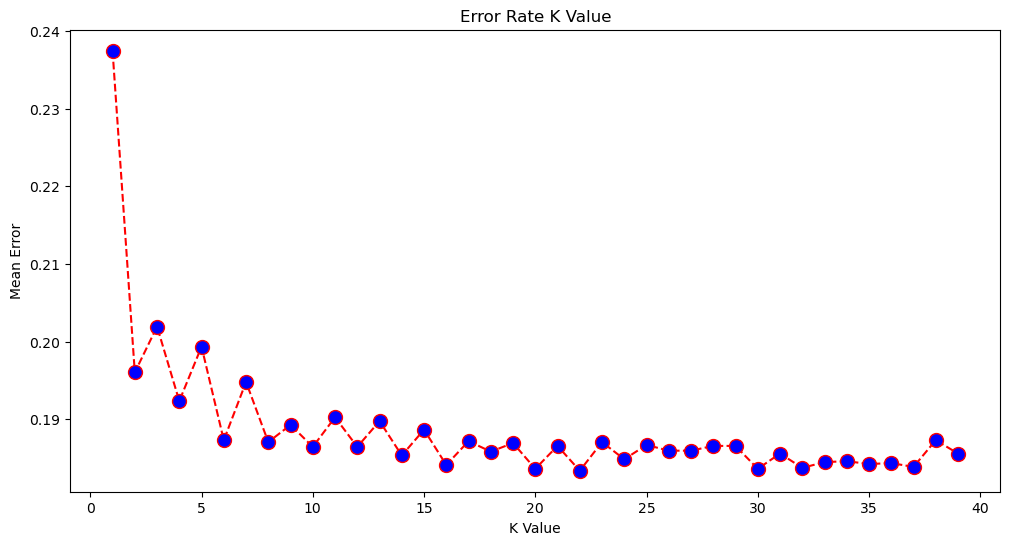

In [20]:
#finding the best k-value

error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt #data visualisation

#calculating error for k values between 1 and 40

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    pred_i=model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error Rate K Value")
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
    
    


In [12]:
#train the value

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
model.fit(X_train,Y_train)


KNeighborsClassifier(n_neighbors=6)

In [15]:
#predicting for all test data

y_pred=model.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

C:\Users\Admin\Videos\Anoconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model:{0}%'.format(accuracy_score(Y_test,y_pred)*100))

Accuracy of the model:81.26765753592925%


In [21]:
age=int(input("enter new employes age:"))
edu=int(input("enter new employes education:"))
cg=int(input("enter new employes captial gain:"))
wh=int(input("enter new employes hour's per week:"))
newemp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newemp))
print(result)

if result==1:
    print("employe shold get salary above 50k")
else:
    print("employe shold not get salary above 50k")

enter new employes age:55
enter new employes education:13
enter new employes captial gain:0
enter new employes hour's per week:45
[1]
employe shold get salary above 50k


C:\Users\Admin\Videos\Anoconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
